            Simple Linear Regression on Advertising Dataset









In [22]:
import pandas as pd

1. Load the dataset Advertising.csv into a Pandas DataFrame?

In [23]:
data=pd.read_csv("Advertising.csv")

2. How do you obtain a statistical summary of the dataset?

In [24]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


3. How do you check the structure of the dataset, including the data types of columns and non-null counts?


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

4. How many rows and columns does the dataset contain and data type of each column in the dataset?

In [27]:
data.shape

(200, 4)

5. What are the features present in the Advertising.csv dataset?

In [28]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

6. Show the relation between total_spend and sales relation using scatterplot and what you understand after visualizing the dataset write down the point?

In [29]:
data["total_spend"]=data["TV"]+data["radio"]+data["newspaper"]

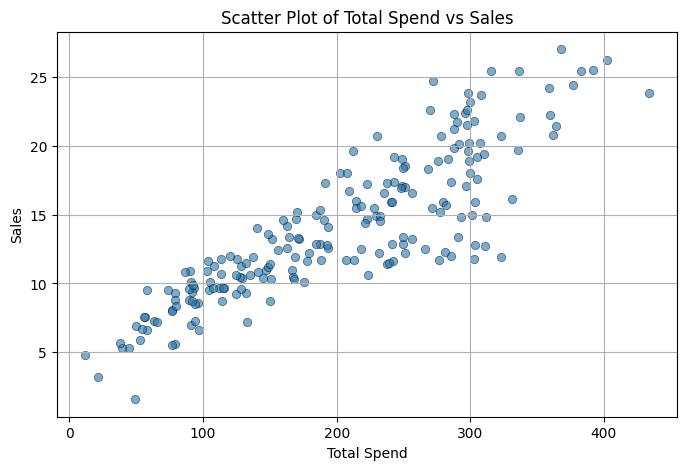

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=data['total_spend'], y=data['sales'], alpha=0.6, edgecolor='k')

# Labels & Title
plt.xlabel("Total Spend")
plt.ylabel("Sales")
plt.title("Scatter Plot of Total Spend vs Sales")
plt.grid(True)
plt.show()

7. Show the relation between total_spend and sales relation using regplot and what you understand after visualizing the dataset write down the point?

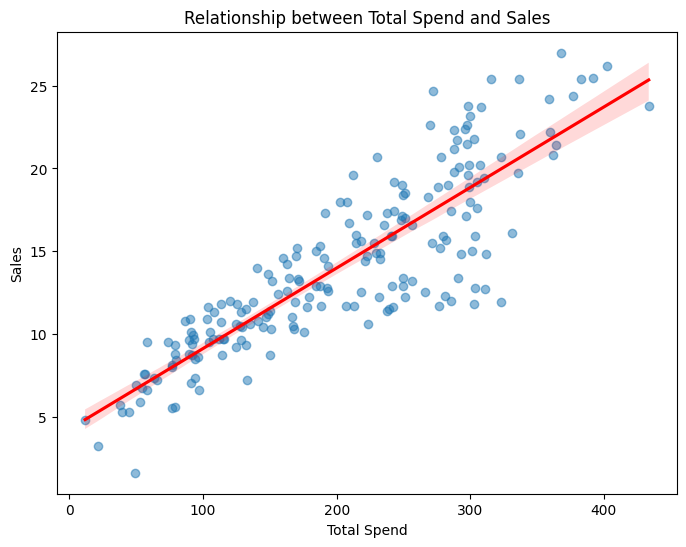

In [31]:
plt.figure(figsize=(8,6))
sns.regplot(x=data["total_spend"], y=data["sales"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Total Spend")
plt.ylabel("Sales")
plt.title("Relationship between Total Spend and Sales")
plt.show()

8. Give capital  ‘X’ to Features and lower ‘y’ to target and Calculate the beta cofficients  Calculate potential_sales and predicted_sales (hint y=B1x+B0,y=mx+b)

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [33]:
X = data[['total_spend']]  
y = data['sales']        

In [34]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [35]:
B1 = model.coef_[0] 
B0 = model.intercept_ 

In [36]:

data["predicted_sales"] = model.predict(X)

data["potential_sales"] = B1 * X + B0

Beta Coefficients: B1 (Slope) = 0.0487, B0 (Intercept) = 4.2430
   total_spend  sales  predicted_sales  potential_sales
0        337.1   22.1        20.655712        20.655712
1        128.9   10.4        10.518896        10.518896
2        132.4    9.3        10.689303        10.689303
3        251.3   18.5        16.478292        16.478292
4        250.0   12.9        16.414998        16.414998


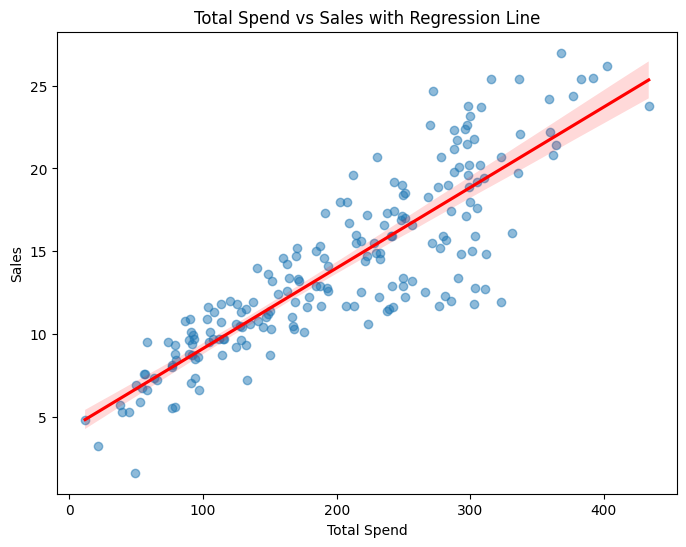

In [37]:

print(f"Beta Coefficients: B1 (Slope) = {B1:.4f}, B0 (Intercept) = {B0:.4f}")
print(data[["total_spend", "sales", "predicted_sales", "potential_sales"]].head())

# Visualizing the Regression Line
plt.figure(figsize=(8,6))
sns.regplot(x=data["total_spend"], y=data["sales"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Total Spend")
plt.ylabel("Sales")
plt.title("Total Spend vs Sales with Regression Line")
plt.show()


9. Plot potential_sales vs predicted_sales  (hint: Regression line color should be red (y=mx+b) and use scatterplot to check whether the data points fit .

(Compare the solution of 7 and 9 questions and check whether the data points match)

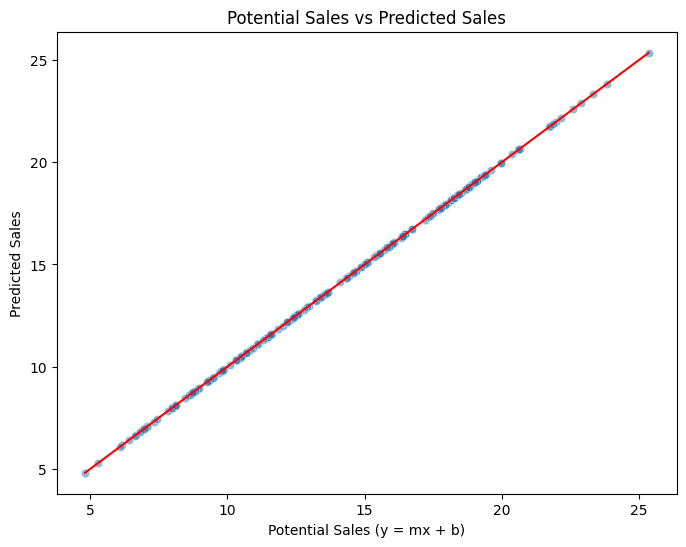

In [38]:
plt.figure(figsize=(8, 6))


sns.scatterplot(x=data["potential_sales"], y=data["predicted_sales"], alpha=0.5)

sns.lineplot(x=data["potential_sales"], y=data["potential_sales"], color="red")

plt.xlabel("Potential Sales (y = mx + b)")
plt.ylabel("Predicted Sales")
plt.title("Potential Sales vs Predicted Sales")


plt.show()



10. How much unit sales do expected when spend is $200?

In [39]:

X_new = 200


expected_sales = B1 * X_new + B0

print(f"Expected Sales when Spend is $200: {expected_sales:.2f}")


Expected Sales when Spend is $200: 13.98


In [ ]:
https://dineshdabeli-cab8h5bghnandmcc.canadacentral-01.azurewebsites.net/